In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import openpyxl
import pandas as pd
from IPython.display import display
import scipy.io
from mat4py import loadmat
import keras
from keras.callbacks import History,EarlyStopping
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.optimizers import RMSprop, Adam
from keras.layers import Reshape
import time
from keras.models import load_model

ModuleNotFoundError: No module named 'keras'

In [2]:
start = time.time()
Results_cross = []
Results_walking = []

def findAllFile_cross(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            if f.endswith('.mat'):
                fullname = os.path.join(root, f)
                mat = loadmat(fullname) 
                Results_cross.append(mat)
                yield fullname
                
def findAllFile_walking(base1):
    for root, ds, fs in os.walk(base1):
        for f in fs:
            if f.endswith('.mat'):
                fullname = os.path.join(root, f)
                mat = loadmat(fullname) 
                Results_walking.append(mat)
                yield fullname
                
                
#build temp list for crossing
IKlist = []
IAlist = []
GVlist = []
#EPlist = []
#EP_OBSlist = []
'''
AP_01list = []
AP_02list = []
AP_03list = []
AP_04list = []
AP_05list = []
AP_06list = []


AP_01_array = np.empty((1,101))
AP_02_array = np.empty((1,101))
AP_03_array = np.empty((1,101))
AP_04_array = np.empty((1,101))
AP_05_array = np.empty((1,101))
AP_06_array = np.empty((1,101))
'''
IK_array = np.empty((6,101,3))
IK_tay = np.empty((3,101))
IK_toay = np.empty((6,3,101))


IA_array = np.empty((4,101,1))
IA_tay = np.empty((1,101))
IA_toay = np.empty((4,1,101))

GV_array = np.empty((1,101,1))
GV_tay = np.empty((1,101))
GV_toay = np.empty((1,1,101))



Feature = np.empty((23,101))
#-----------------------------------------------
#build temp list for walking
IKlist_w = []
IAlist_w = []
GVlist_w = []

IK_array_w = np.empty((6,101,3))
IK_tay_w = np.empty((3,101))
IK_toay_w = np.empty((6,3,101))


IA_array_w = np.empty((4,101,1))
IA_tay_w = np.empty((1,101))
IA_toay_w = np.empty((4,1,101))

GV_array_w = np.empty((1,101,1))
GV_tay_w = np.empty((1,101))
GV_toay_w = np.empty((1,1,101))


def getfeature(value,posture):
   
    if posture =='cross':
        x = Results_cross[value]['Results']['IK']
        IKlist.append(x)

        IK_array[0,:,:] = np.array(IKlist[value]['LeadingAnkle'])
        IK_array[1,:,:] = np.array(IKlist[value]['LeadingHip'])
        IK_array[2,:,:] = np.array(IKlist[value]['LeadingKnee'])
        IK_array[3,:,:] = np.array(IKlist[value]['TrailingAnkle'])
        IK_array[4,:,:] = np.array(IKlist[value]['TrailingHip'])
        IK_array[5,:,:] = np.array(IKlist[value]['TrailingKnee'])



        for i in range(IK_toay.shape[0]):  
            IK_tay = np.transpose(IK_array[i])
            IK_toay[i,:,:] = IK_tay


        k = 0
        for i in range(IK_toay.shape[0]):
            for j in range(IK_toay.shape[1]):
                Feature[k,:] = IK_toay[i,j,:] #k = 3*i+j
                k += 1

        y = Results_cross[value]['Results']['IA']
        IAlist.append(y)
        IA_array[0,:,:] = np.array(IAlist[value]['FrontalIA'])
        IA_array[1,:,:] = np.array(IAlist[value]['FrontalRCIA'])
        IA_array[2,:,:] = np.array(IAlist[value]['SagittalIA'])
        IA_array[3,:,:] = np.array(IAlist[value]['SagittalRCIA'])

        for i in range(IA_array.shape[0]):
          IA_tay = np.transpose(IA_array[i])
          IA_toay[i,:,:] = IA_tay


        for i in range(IA_toay.shape[0]):
            for j in range(IA_toay.shape[1]):
                Feature[k,:] = IA_toay[i,j,:] #k = 3*i+j
                k += 1

        z = Results_cross[value]['Results']['SelfDefinedVariables']
        GVlist.append(z)
        GV_array[0,:,:] = np.array(GVlist[value]['GaitVelocity'])
        GV_tay = np.transpose(GV_array[0])
        GV_toay[0,:,:] = GV_tay
        Feature[22,:] = GV_toay[0,0,:]
        '''
        #取出AP單一值資料並變成序列資料
        B = Results_cross[value]['Results']['AP']['BodyHeight']
        AP_01list.append(B)
        for i in range(101):
            AP_01_array[:,i] = np.array(AP_01list[value])
            Feature[23,:] = AP_01_array[:,i]

        C = Results_cross[value]['Results']['AP']['BW']
        AP_02list.append(C)
        for i in range(101):
            AP_02_array[:,i] = np.array(AP_02list[value])
            Feature[24,:] = AP_02_array[:,i]

        D = Results_cross[value]['Results']['AP']['FootLength']
        AP_03list.append(D)
        for i in range(101):
            AP_03_array[:,i] = np.array(AP_03list[value])
            Feature[25,:] = AP_03_array[:,i]

        E = Results_cross[value]['Results']['AP']['HipWidth']
        AP_04list.append(E)
        for i in range(101):
            AP_04_array[:,i] = np.array(AP_04list[value])
            Feature[26,:] = AP_04_array[:,i]

        F = Results_cross[value]['Results']['AP']['ShankLength']
        AP_05list.append(F)
        for i in range(101):
            AP_05_array[:,i] = np.array(AP_05list[value])
            Feature[27,:] = AP_05_array[:,i]

        G = Results_cross[value]['Results']['AP']['ThighLength']
        AP_06list.append(G)
        for i in range(101):
            AP_06_array[:,i] = np.array(AP_06list[value])
            Feature[28,:] = AP_06_array[:,i]
        '''
    elif posture =='walk':
        x = Results_walking[value]['Results']['IK']
        IKlist_w.append(x)
        
        IK_array_w[0,:,:] = np.array(IKlist_w[value]['LeadingAnkle'])
        IK_array_w[1,:,:] = np.array(IKlist_w[value]['LeadingHip'])
        IK_array_w[2,:,:] = np.array(IKlist_w[value]['LeadingKnee'])
        IK_array_w[3,:,:] = np.array(IKlist_w[value]['TrailingAnkle'])
        IK_array_w[4,:,:] = np.array(IKlist_w[value]['TrailingHip'])
        IK_array_w[5,:,:] = np.array(IKlist_w[value]['TrailingKnee'])
        
        
       
        for i in range(IK_toay_w.shape[0]):  
            IK_tay_w = np.transpose(IK_array_w[i])
            IK_toay_w[i,:,:] = IK_tay_w
       
    
        k = 0
        for i in range(IK_toay_w.shape[0]):
            for j in range(IK_toay_w.shape[1]):
                Feature[k,:] = IK_toay_w[i,j,:] #k = 3*i+j
                k += 1
            
        y = Results_walking[value]['Results']['IA']
        IAlist_w.append(y)
        IA_array_w[0,:,:] = np.array(IAlist_w[value]['FrontalIA'])
        IA_array_w[1,:,:] = np.array(IAlist_w[value]['FrontalRCIA'])
        IA_array_w[2,:,:] = np.array(IAlist_w[value]['SagittalIA'])
        IA_array_w[3,:,:] = np.array(IAlist_w[value]['SagittalRCIA'])
        
        for i in range(IA_array_w.shape[0]):
          IA_tay_w = np.transpose(IA_array_w[i])
          IA_toay_w[i,:,:] = IA_tay_w
        
        for i in range(IA_toay_w.shape[0]):
            for j in range(IA_toay_w.shape[1]):
                Feature[k,:] = IA_toay_w[i,j,:] #k = 3*i+j
                k += 1
        
        z = Results_walking[value]['Results']['SelfDefinedVariables']
        GVlist_w.append(z)
        GV_array_w[0,:,:] = np.array(GVlist_w[value]['GaitVelocity'])
        GV_tay_w = np.transpose(GV_array_w[0])
        GV_toay_w[0,:,:] = GV_tay_w
        Feature[22,:] = GV_toay_w[0,0,:]
    
    
        
    return Feature

Feature_cross = np.empty((204,23,101))
Feature_walking = np.empty((204,23,101))
FEATUREccc = np.empty((23,101))
FEATUREwww = np.empty((23,101))
YY_cross = []
YY_walking = []

base = r"C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/"
base1 = r"C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/"

for i in findAllFile_cross(base):
    print(i)
    
for j in findAllFile_walking(base1):
        print(j)


for i in range(len(Results_cross)):
    FEATUREccc= getfeature(i,'cross')
    Feature_cross[i,:,:] = FEATUREccc

for i in range(len(Results_walking)):
        FEATUREwww= getfeature(i,'walk')
        Feature_walking[i,:,:] = FEATUREwww

    
Feature_totally = np.concatenate((Feature_cross, Feature_walking),axis = 0)

for i in range(204):
    x = 1
    YY_cross.append(x)
Y_cross = np.array(YY_cross)
    
for i in range(204):
    x = 0
    YY_walking.append(x)
Y_walking = np.array(YY_walking)
       
Y_totally = np.concatenate((Y_cross, Y_walking),axis = 0)

C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC10\Trial40\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC10\Trial41\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC10\Trial49\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC10\Trial50\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC20\Trial100\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC20\Trial109\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC20\Trial110\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC20\Trial99\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC30\Trial113\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC30\Trial114\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E01\OC30\Trial116\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Resul

C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC10\Trial52\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC10\Trial54\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC20\Trial87\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC20\Trial88\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC20\Trial90\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC20\Trial91\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC30\Trial107\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC30\Trial108\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC30\Trial113\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E13\OC30\Trial116\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_cross/E14\OC10\Trial48\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results

C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E11\Walking_3\Trial02\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E11\Walking_3\Trial04\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E11\Walking_3\Trial08\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking\Trial06\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking\Trial08\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking\Trial11\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking_1\Trial06\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking_1\Trial08\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking_1\Trial11\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking_2\Trial06\Results.mat
C:/Users/Danny Lee/Desktop/motion hw/final/Results_walking/E12\Walking_2\Tri

In [3]:
X_normalized = (Feature_totally - Feature_totally.mean()) / Feature_totally.std()
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_totally, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(len(X_train),len(y_train))
print(len(X_val),len(y_val))
print(len(X_test),len(y_test))
#train=0.6，val=0.2，test=0.2

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[2] , X_train.shape[1])
X_val =X_val.reshape(X_val.shape[0],X_val.shape[2] , X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2] , X_test.shape[1])

244 244
82 82
82 82


In [4]:
class SelfAttention(keras.layers.Layer):
        def __init__(self, attention_units):
            super(SelfAttention, self).__init__()
            self.attention_units = attention_units

        def build(self, input_shape):
            self.W = self.add_weight(
                shape=(input_shape[-1], self.attention_units),
                initializer="glorot_uniform",
                trainable=True
            )
            self.b = self.add_weight(
                shape=(self.attention_units,),
                initializer="zeros",
                trainable=True
            )
            self.V = self.add_weight(
                shape=(self.attention_units, 1),
                initializer="glorot_uniform",
                trainable=True
            )
    
        def call(self, inputs):
            score = keras.activations.tanh(keras.backend.dot(inputs, self.W) + self.b)
            attention_weights = keras.activations.softmax(keras.backend.dot(score, self.V), axis=1)
            attended_input = inputs * attention_weights
            return attended_input

In [10]:
#import tensorflow as tf
d = 0.01
model = Sequential()
model.add(Bidirectional(GRU(64, input_shape=(101,23))))
model.add(Dropout(d))
#model.add(SelfAttention(64))
model.add(Dense(32,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer= opt,metrics=['accuracy'])
start_fitting = time.time()
#earlystopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=2, mode='auto', restore_best_weights=True)
model.fit(X_train, y_train, epochs = 2000, batch_size = 32,validation_data=(X_val, y_val),callbacks=[monitor]) #训练模型1000次
epochxxx =  monitor.stopped_epoch+1
fitting_model_time = time.time()
print('Training Model took: ', fitting_model_time - start_fitting)

D:\Users\Ray Lee\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  import sys
D:\Users\Ray Lee\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Train on 244 samples, validate on 82 samples
Epoch 1/2000
244/244 [==============================] - 1s 3ms/step - loss: 0.6788 - accuracy: 0.6926 - val_loss: 0.6863 - val_accuracy: 0.5366
Epoch 2/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6926 - val_loss: 0.6820 - val_accuracy: 0.5366
Epoch 3/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.6926 - val_loss: 0.6813 - val_accuracy: 0.5366
Epoch 4/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.6926 - val_loss: 0.6690 - val_accuracy: 0.5366
Epoch 5/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.6926 - val_loss: 0.6212 - val_accuracy: 0.5366
Epoch 6/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.6926 - val_loss: 0.6562 - val_accuracy: 0.5366
Epoch 7/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.5489 - accura

244/244 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0936 - val_accuracy: 0.9268
Epoch 114/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9959 - val_loss: 0.0852 - val_accuracy: 0.9756
Epoch 115/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9959 - val_loss: 0.0767 - val_accuracy: 0.9878
Epoch 116/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9795 - val_loss: 0.1095 - val_accuracy: 0.9268
Epoch 117/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9918 - val_loss: 0.0952 - val_accuracy: 0.9512
Epoch 118/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0695 - val_accuracy: 0.9878
Epoch 119/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9918 - val_loss: 0.1132 - val_accuracy: 

244/244 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9878
Epoch 226/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9878
Epoch 227/2000
244/244 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 228/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9878
Epoch 229/2000
244/244 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9878
Epoch 230/2000
244/244 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9878
Epoch 231/2000
244/244 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 

In [11]:
model.build(input_shape)
print(model.summary())
with open('./LSTM model performance/for_classfication/modelsummary.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

#保存模型和權重
saved = model.save('./LSTM model performance/for_classfication/Regression.h5')    
model.save_weights('./LSTM model performance/for_classfication/Regression_weights.h5')  # to store

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 128)               33792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

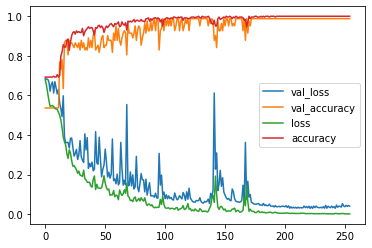

In [12]:
#画出迭代loss和acc曲线
pd.DataFrame(model.history.history).plot()

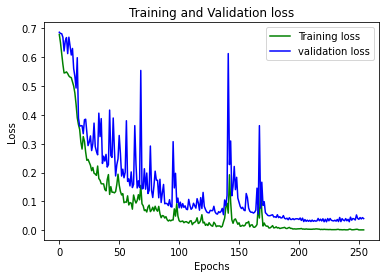

In [13]:
#%% plot loss and epoch relation
loss_train = model.history.history['loss']
loss_val = model.history.history['val_loss']
epochs = range(epochxxx)
fig = plt.figure()
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig('./LSTM model performance/for_classfication/train_Validation_loss.png')

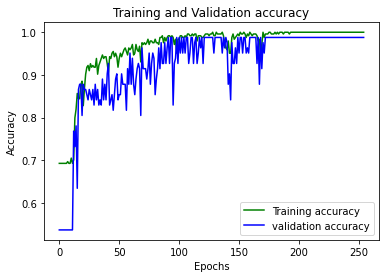

In [14]:
loss_train = model.history.history['accuracy']
loss_val = model.history.history['val_accuracy']
epochs = range(epochxxx)
fig1 = plt.figure()
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
fig1.savefig('./LSTM model performance/for_classfication/train_Validation_accuracy.png')

In [17]:
#在訓練集上的擬合結果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train_predict>0.5
y_train_predict=[int(i) for i in y_train_predict>0.5]
y_train_predict=np.array(y_train_predict)
from sklearn import metrics
print("訓練集精確度等指標：")
print(metrics.classification_report(y_train,y_train_predict))
print("混淆矩陣：") 
print(metrics.confusion_matrix(y_train,y_train_predict))

訓練集精確度等指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       123

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244

混淆矩陣：
[[121   0]
 [  0 123]]


In [18]:
#在測試集上的擬合結果
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
y_test_predict>0.5
y_test_predict=[int(i) for i in y_test_predict>0.5]
y_test_predict=np.array(y_test_predict)
prediction_model_time = time.time()
print('Making Predictions took: ', prediction_model_time - fitting_model_time)
from sklearn import metrics
print("測試集精確度等指標：")
print(metrics.classification_report(y_test,y_test_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(y_test,y_test_predict))
end = time.time()
print('TOTAL time spent', end-start)

Making Predictions took:  1388.6473608016968
測試集精確度等指標：
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        47

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82

混淆矩陣：
[[35  0]
 [ 1 46]]
TOTAL time spent 1750.8694167137146
